# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

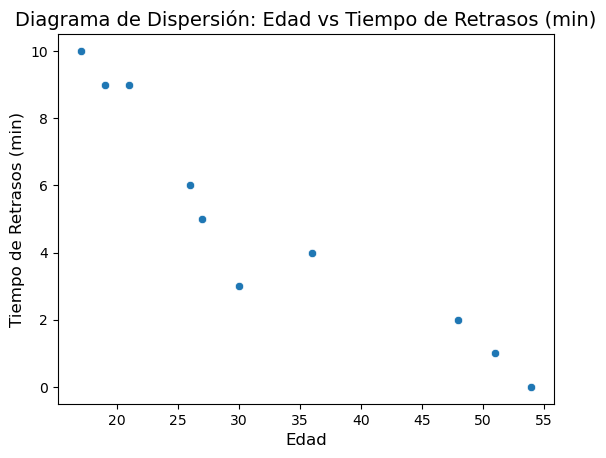

In [4]:
sns.scatterplot(x='Edad', y='Retrasos', data=student_data)
plt.title('Diagrama de Dispersión: Edad vs Tiempo de Retrasos (min)', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Tiempo de Retrasos (min)', fontsize=12)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*tu explicación aquí*

- Hay una tendencia negativa, a más edad menos minutos de retraso.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [6]:
cov = student_data[['Edad', 'Retrasos']].cov().iloc[0, 1]
cov

-45.56666666666666

In [ ]:
# La covarianza mide la relación lineal entre las dos variables, como varia la Edad respecto a los Retrasos. 
# Al ser una covarianza negativa, indica que cuando la edad aumenta, los retrasos disminuyen.
# Si fuera cercana a 0, indicaría que no hay una relación lineal clara entre ambas variables.

In [7]:
corr = student_data[['Edad', 'Retrasos']].corr().iloc[0, 1]
corr

-0.9391626886887123

In [ ]:
# La correlación mide la fuerza y la dirección de la relación lineal entre las dos variables. Está normalizada entre -1 y 1.
# 1: Indiaca relación perfecta positiva
# -1: Indica relación lineal perfecta negativa
# 0: Indica que no hay ninguna relación lineal entre ambas variables.

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Ambas variables tienen una relación lineal negativa fuerte, y queremos predecir una variable numérica a partir de otra, por lo que usaremos una regresión lineal.
# Nuestra variable dependiente (y) (resultado a predecir) que usaremos es: 'Retrasos' para predecir el tiempo de retrasos basado en la edad
# y la variable independiente (x) (usada para la predicción) es: 'Edad'
# regresion lineal: y = pendiente * x + intercepto para predecir valores de tiempo retrasos para cualquier valor dado de edad.

# Variable independiente (X)
X = student_data[['Edad']]
# Variable dependiente (y)
y = student_data[['Retrasos']]

# Init lineal regresion model
model = LinearRegression()

# Fit model 
model.fit(X,y)

# Coeficiente pendiente de la línea de regresión
pendent_coef = model.coef_[0]
# Coeficiente intercepto de la línea de regresión
intercept_coef = model.intercept_

print(f"Coeficiente pendiente: {pendent_coef}")
print(f"Coeficiente intercept: {intercept_coef}")

# Predict model
y_pred = model.predict(X)

Coeficiente pendiente: [-0.24282077]
Coeficiente intercept: [12.88880336]


Grafica tu modelo de regresión en tu diagrama de dispersión.

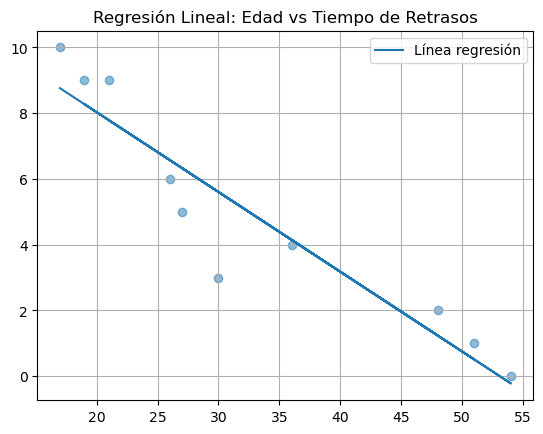

In [13]:
plt.scatter(student_data['Edad'], student_data['Retrasos'], alpha=0.5)
plt.plot(student_data['Edad'], y_pred, label='Línea regresión')
plt.title('Regresión Lineal: Edad vs Tiempo de Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [14]:
# para predecir tiempo retraso para edad de 40:
edad = 40
tiempo_retraso_predecido = model.coef_[0] * edad + model.intercept_
tiempo_retraso_predecido

array([3.17597253])

*tu explicación aquí*

Conclusión: 
- El coeficiente pendiente es negativo, lo que indica que existe una relación negativa entre la edad y el tiempo de retraso. A medida que la edad aumenta, el tiempo de retrasos tiende a disminuir en 0.24 min.
- El coeficiente intercepto representa el valor del tiempo de retraso cuando la edad es 0. 


- En base al modelo podemos concluir que la edad tiene una relación negativa con el tiempo de retraso pero la fuerza de la relación es muy baja (0.24), lo que indica que por cada año adicional el cambio en el tiempo de retraso es pequeño.
- No tenemos mucha confianaza en la capacidad predictiva de la edad respecto al tiempo porque el coef es pequeño, lo que indica que no es un predictor fuerte. 
Tendría que tener un coef mayor que implicaría una relación más fuerte entre las dos variables.





## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [3]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [4]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [5]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [7]:
# Detectar variable más importante y menos importante para determinar las emisiones de CO2:
# Usamos la correlación de Pearson entre las columnas numéricas: 1 corr positiva, 0 no corr, -1 corr neg
vehicles_var_num = vehicles.select_dtypes(include=['number'])
correlations = vehicles_var_num.corr()
correlations

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


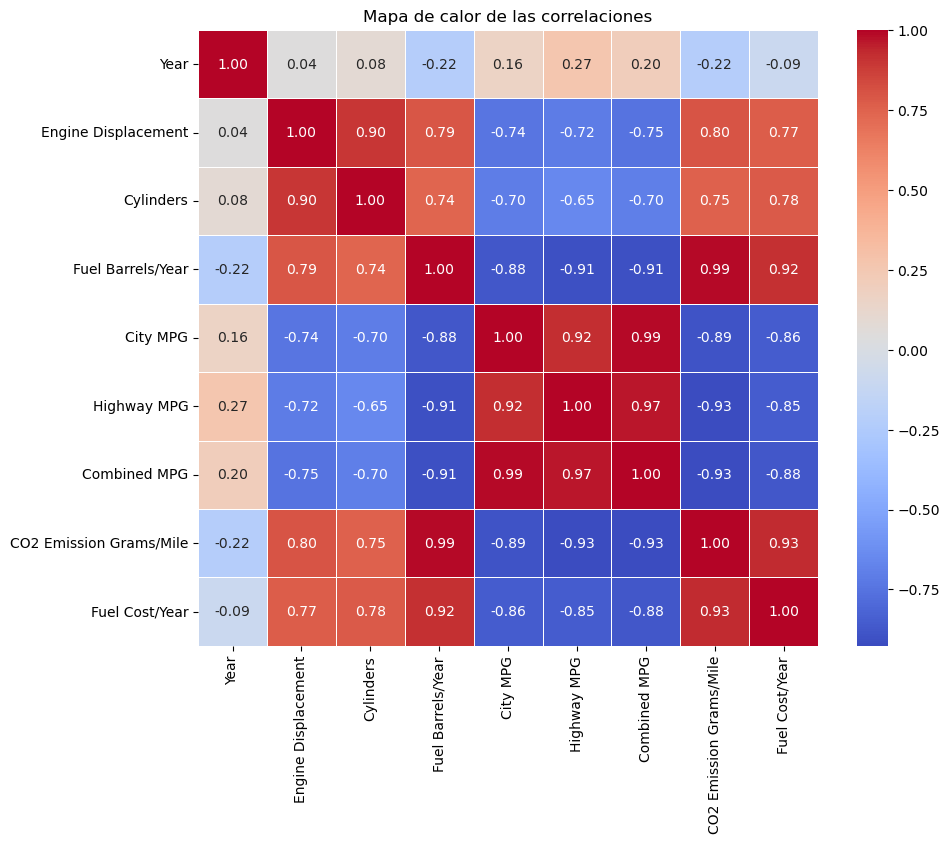

In [26]:
# Visaulizamos correlaciones graficamente
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de las correlaciones')
plt.show()

In [ ]:
# Por el mapa vemos que tienen una fuerte correlación con la variable CO2 todas las variables menos la de 'year'
# La variable más importante será 'Fuel Barrels/Year' con 0.99 de correlación
# La variable que menos información nos proporciona respecto al CO2 es el 'Year'

In [ ]:
# Probamos también con las no numéricas, convertimos las categóricas en var dummies y con One-Hot encoding

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # Convertir variables categóricas a numéricas con One-Hot Encoding
# vehicles_encoded = pd.get_dummies(vehicles, drop_first=True)

# # Calcular la matriz de correlación
# correlation_matrix = vehicles_encoded.corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Heatmap de Correlación de Todas las Variables")
# plt.show()



In [ ]:
# Tarda mucho el anterior heatmap en mostrar resultados: separarlas para hacer el heatmap solo de las categóricas con el CO2:

# Separar Variables
vehicles_var_categorical = vehicles.select_dtypes(include=['object']).columns

vehicles_transformed = pd.get_dummies(vehicles[vehicles_var_categorical], drop_first=True)

vehicles_transformed['CO2'] = vehicles['CO2 Emission Grams/Mile']

# # Preprocesar variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', vehicles_var_numerical),  # Mantener las columnas numéricas tal cual
#         ('cat', OneHotEncoder(), vehicles_var_categorical)  # Codificar las variables categóricas
#     ])

correlation_matrix = vehicles_transformed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación de Todas las Variables", fontsize=16)
plt.show()

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

Es un modelo de regresión múltiple debido a la presencia de múltiples predictores.

In [28]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score

# Seleccionamos las var independientes predictoras, features
X= vehicles.drop(columns='CO2 Emission Grams/Mile')
# Seleccionamos la var a predecir, target
y = vehicles['CO2 Emission Grams/Mile']

# Separar Variables
vehicles_var_categorical = X.select_dtypes(include=['object']).columns
vehicles_var_numerical = X.select_dtypes(include=['number']).columns

# Preprocesar variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', vehicles_var_numerical),  # Mantener las columnas numéricas tal cual
        ('cat', OneHotEncoder( handle_unknown='ignore'), vehicles_var_categorical)  # Codificar las variables categóricas
    ])

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(vehicles[vehicles_var_numerical + vehicles_var_categorical], y, test_size=0.2, random_state=42)

# Construir el modelo con un pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Aplicar preprocesamiento
    ('regressor', Ridge(alpha=1.0))   # Usar Ridge para manejar la multicolinealidad
])

# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


MSE: 216.29
R^2: 0.98


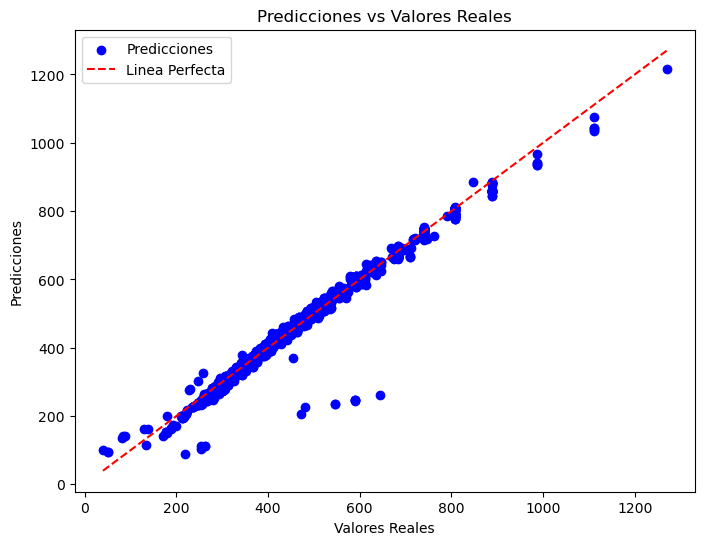

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linea Perfecta')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

                                       Coeficiente
Year                                     -0.264175
Engine Displacement                       3.815398
Cylinders                                 0.993812
Fuel Barrels/Year                        16.798551
City MPG                                 -0.131154
...                                            ...
Fuel Type_Premium and Electricity        -0.057184
Fuel Type_Premium or E85                 -0.073660
Fuel Type_Regular                         4.368905
Fuel Type_Regular Gas and Electricity    -0.024315
Intercepto                              642.219156

[3685 rows x 1 columns]
                               Coeficiente
Fuel Barrels/Year                16.798551
Fuel Type_Premium                -5.870469
Fuel Type_Regular                 4.368905
Engine Displacement               3.815398
Highway MPG                      -1.383828
Transmission_Automatic 4-spd      1.123617
Cylinders                         0.993812
Combined MPG       

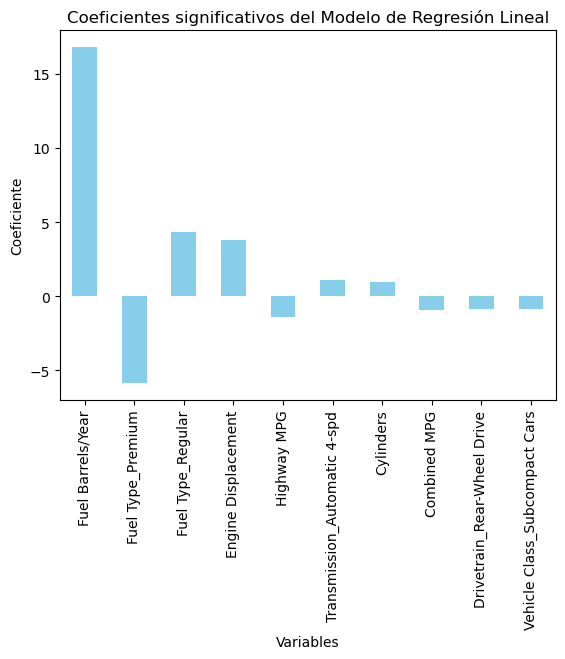

In [ ]:
#No se pueden ver los valores al ser tantas variables, reduciremos a los top 10 que tengan un coef más alto absoluto

# Obtener los coeficientes
# Los coeficientes después del OneHotEncoder son correspondientes a las variables codificadas
coeficientes = model.named_steps['regressor'].coef_

# Extraer las columnas que fueron creadas por OneHotEncoder
encoded_columns = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(vehicles_var_categorical)

# Unir las columnas numéricas originales y las columnas codificadas
all_columns = np.concatenate([vehicles_var_numerical, encoded_columns])

# Crear un DataFrame con los coeficientes y las columnas correspondientes
coef_df = pd.DataFrame(coeficientes, index=all_columns, columns=['Coeficiente'])

# Agregar el intercepto al DataFrame como una fila separada
intercepto = model.named_steps['regressor'].intercept_
coef_df.loc['Intercepto'] = intercepto

# Imprimir el DataFrame de coeficientes
print(coef_df)

# Visualizar los coeficientes en un gráfico de barras:
# Eliminar el intercepto de la visualización: El intercepto no es una variable, por lo que lo quitamos
coef_df = coef_df[coef_df.index != 'Intercepto']
coef_df_sorted = coef_df.reindex(coef_df['Coeficiente'].abs().sort_values(ascending=False).index)
top_10_coef = coef_df_sorted.head(10)
# Mostrar las top 10 variables más importantes
print(top_10_coef)

# Gráfico
top_10_coef['Coeficiente'].plot(kind='bar', color='skyblue')
plt.title('Coeficientes significativos del Modelo de Regresión Lineal')
plt.xlabel('Variables')
plt.ylabel('Coeficiente')
plt.show()

In [ ]:
# Podemos obtener de conclusión que las variable más importante es Fuel Barrels/Year y tiene un impacto fuerte en las emisiones de CO2. 
# Tiene sentido, el consumo de combustible es proporcional a las emisiones.

# Engine Displacement  y Cylinders también son factores importantes, a motores más grandes y con más cilindros suelen consumir más combustibles y generar más emisiones.

In [ ]:
# El MSE mide la diferencia promedio entre las predicciones y los valores reales, cuadrada. 
# En este caso, el valor de 216.62 es relativamente bajo, lo que sugiere que las predicciones están bastante cerca de los valores reales.

# R² mide la proporción de la variabilidad total en la variable dependiente (en este caso, las emisiones de CO2). 
# Un R² de 0.98 es muy alto, lo que significa que el modelo es capaz de explicar el 98% de la variabilidad de las emisiones de CO2 en función de las características del coche. 
#Esto es una señal de que el modelo es bastante efectivo y está haciendo predicciones de alta calidad.


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [41]:
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}
df = pd.DataFrame(data)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [45]:
X = df[['X']] #dataframe 2D
y = df['Y']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)


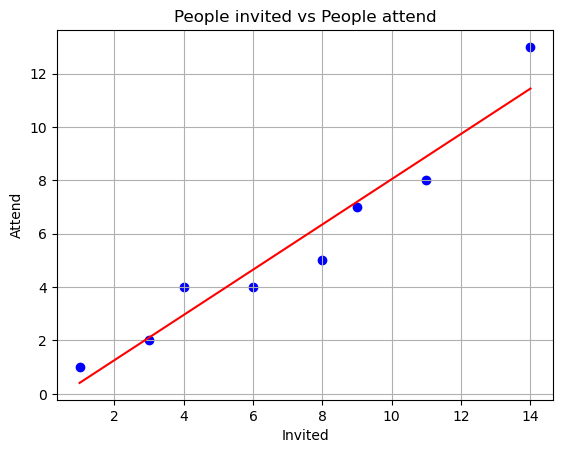

In [46]:
plt.scatter(df['X'], df['Y'], color='blue', label='Datos reales')

plt.plot(df['X'], y_pred, color='red', label='Línea de Regresión')

plt.xlabel('Invited')
plt.ylabel('Attend')
plt.title('People invited vs People attend')
plt.grid(True)
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

In [48]:
# Evaluar
print("Coeficiente:", model.coef_)
print("Intercepción:", model.intercept_)
print("R^2:", model.score(X, y))

Coeficiente: [0.84848485]
Intercepción: -0.43939393939393767
R^2: 0.9316696375519905


*tu explicación aquí*

El coeficiente es positivo, la relación entre las dos variables es directa o positiva, a medida que las personas invitadas aumentan el número de personas que atienden también aumenta.

El valor del R^2 tan alto indica que el modelo de regresión es muy bueno para predecir el número de asitentes a partir de el número de invitados. 
El número de invitados tiene un gran impacto, una relación muy fuerte, en el número de personas que asistirán y el modelo se ajusta bien a los datos.


¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

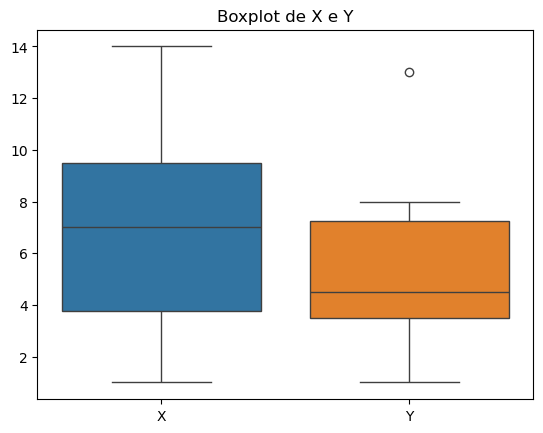

In [ ]:
# Hay outliers

# Crear un boxplot para las columnas X y Y
sns.boxplot(data=df[['X', 'Y']])

# Título y etiquetas
plt.title('Boxplot de X e Y')
plt.show()

In [51]:
# Calcular el IQR para X y Y
Q1_X = df['X'].quantile(0.25)
Q3_X = df['X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

Q1_Y = df['Y'].quantile(0.25)
Q3_Y = df['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

# Límite inferior y superior para X y Y
lower_limit_X = Q1_X - 1.5 * IQR_X
upper_limit_X = Q3_X + 1.5 * IQR_X

lower_limit_Y = Q1_Y - 1.5 * IQR_Y
upper_limit_Y = Q3_Y + 1.5 * IQR_Y

# Identificar los outliers
outliers_X = df[(df['X'] < lower_limit_X) | (df['X'] > upper_limit_X)]
outliers_Y = df[(df['Y'] < lower_limit_Y) | (df['Y'] > upper_limit_Y)]

print("Outliers en X:")
print(outliers_X)

print("\nOutliers en Y:")
print(outliers_Y)

Outliers en X:
Empty DataFrame
Columns: [X, Y]
Index: []

Outliers en Y:
    X   Y
7  14  13


Coeficiente: [0.84730539]
Intercepción: -0.38023952095808156
R^2 en conjunto de entrenamiento: 0.920
R^2 en conjunto de prueba: 0.993


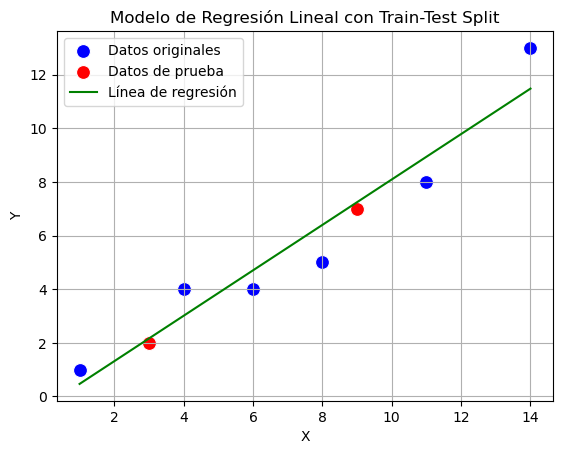

In [65]:
#Predict con los datos sin outliers
X = df[['X']] #dataframe 2D
y = df['Y']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Init modelo
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Resultados del modelo
print("Coeficiente:", model.coef_)
print("Intercepción:", model.intercept_)
print(f"R^2 en conjunto de entrenamiento: {train_score:.3f}")
print(f"R^2 en conjunto de prueba: {test_score:.3f}")
# Visualizar
# Datos originales y de prueba
sns.scatterplot(data=df, x='X', y='Y', color='blue', label='Datos originales', s=100)
sns.scatterplot(x=X_test['X'], y=y_test, color='red', label='Datos de prueba', s=100)

# Línea de regresión
plt.plot(X, model.predict(X), color='green', label='Línea de regresión')

plt.title("Modelo de Regresión Lineal con Train-Test Split")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# El outlier es invitando a 14 que asistan casi todos, 13.
# Quitamos outlier
df_filtered = df[(df['X'] >= lower_limit_X) & (df['X'] <= upper_limit_X) &
                 (df['Y'] >= lower_limit_Y) & (df['Y'] <= upper_limit_Y)]
df_filtered


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


Coeficiente: [0.62328767]
Intercepción: 0.8630136986301356
R^2 en conjunto de entrenamiento: 0.859
R^2 en conjunto de prueba: -0.547


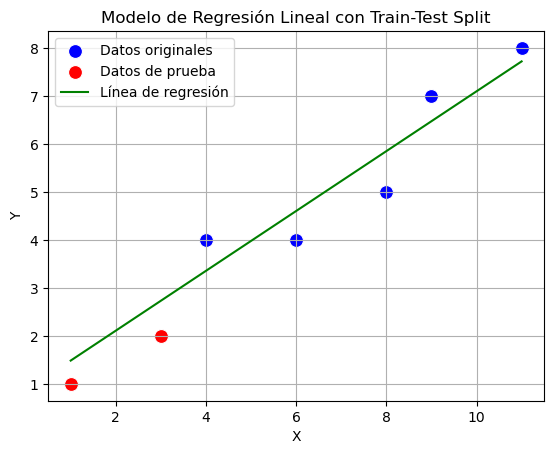

In [64]:
#Predict con los datos sin outliers
X = df_filtered[['X']] #dataframe 2D
y = df_filtered['Y']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Init modelo
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Resultados del modelo
print("Coeficiente:", model.coef_)
print("Intercepción:", model.intercept_)
print(f"R^2 en conjunto de entrenamiento: {train_score:.3f}")
print(f"R^2 en conjunto de prueba: {test_score:.3f}")
# Visualizar
# Datos originales y de prueba
sns.scatterplot(data=df_filtered, x='X', y='Y', color='blue', label='Datos originales', s=100)
sns.scatterplot(x=X_test['X'], y=y_test, color='red', label='Datos de prueba', s=100)

# Línea de regresión
plt.plot(X, model.predict(X), color='green', label='Línea de regresión')

plt.title("Modelo de Regresión Lineal con Train-Test Split")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

Coeficiente: [0.68421053]
Intercepción: 0.32330827067669166
R^2: 0.9433811802232854


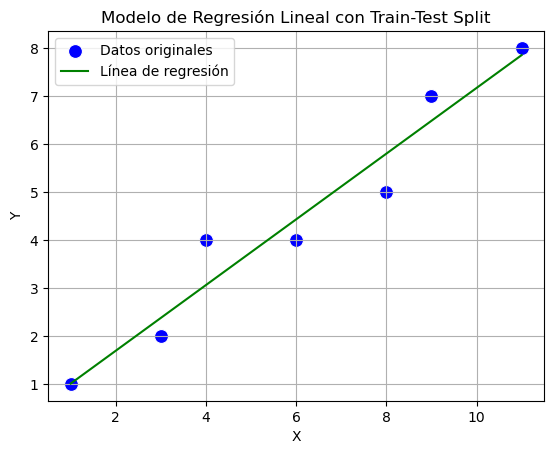

In [61]:
#Predict con los datos sin outliers
X = df_filtered[['X']] #dataframe 2D
y = df_filtered['Y']

# Init modelo
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X, y)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar
print("Coeficiente:", model.coef_)
print("Intercepción:", model.intercept_)
print("R^2:", model.score(X, y))

# Visualizar
# Datos originales y de prueba
sns.scatterplot(data=df_filtered, x='X', y='Y', color='blue', label='Datos originales', s=100)

# Línea de regresión
plt.plot(X, model.predict(X), color='green', label='Línea de regresión')

plt.title("Modelo de Regresión Lineal con Train-Test Split")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

In [ ]:
# Real:
# Coeficiente: [0.91139241]
# Intercepción: -1.0379746835443067
# R^2 en conjunto de entrenamiento: 0.893
# R^2 en conjunto de prueba: 0.933

# Sin Outlier:
# Coeficiente: [0.58878505]
# Intercepción: 0.9813084112149539
# R^2 en conjunto de entrenamiento: 0.863
# R^2 en conjunto de prueba: 0.932


#Con 02 para prueba

# Coeficiente: [0.84730539]
# Intercepción: -0.38023952095808156
# R^2 en conjunto de entrenamiento: 0.920
# R^2 en conjunto de prueba: 0.993

#Sin outlier:
# Coeficiente: [0.62328767]
# Intercepción: 0.8630136986301356
# R^2 en conjunto de entrenamiento: 0.859
# R^2 en conjunto de prueba: -0.547

*tu explicación aquí*

Con el outlier influia en los coeficientes de la regresión, ya que este dato extremo tiende ha acercar la línea de regresión hacia él y no generalizar bien.
Después de eliminarlo, los coeficientes tienen mejor la relación real entre las variables. La predicción de nuevos valores podría ser más precisa.

El coeficiente ahora es menor, lo que indica que la relación entre X e Y es más moderada tras eliminar el outlier.
La intercepción también cambia debido a que la línea de regresión se ajusta mejor a los datos restantes.
El R^2 refleja una relación más genuina entre las variables.

Conclusión:
Un modelo más robusto y generalizable.
Coeficientes que reflejan mejor las relaciones reales.
Mejores predicciones en conjuntos de datos no vistos.
Si los outliers no eran errores o valores extremos reales, podríamos estar excluyendo información importante.
El modelo es más confiable porque la relación que encuentra entre las variables ya no está sesgada por puntos extremos que no representan la mayoría de los datos.
